
**Analise Qualidade de Vinho**







ANÁLISE EXPLORATÓRIA:

Análise Exploratória

---


In [ ]:
# Declarando as bibliotecas, importando os dados .csv e definindo a variável "df" para o DataFrame.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv('wine.csv')

Uma primeira impressão sobre os dados e os descritores estatísticos:

In [ ]:
# A função describe() de um DataFrame auxilia a entender algumas medidas estatísticas que descrevem os dados. 
# Serve para entender se uma distribuição é muito diferente de outra e se existe ou não a presença de pontos incomuns.
display(df.head(n=5))
display(df.describe())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.534709
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.498950
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


In [ ]:
# Mostrando todas as colunas

df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
# Agrupando por qualidade e fazendo a média de cada coluna.

df.groupby("quality").mean()

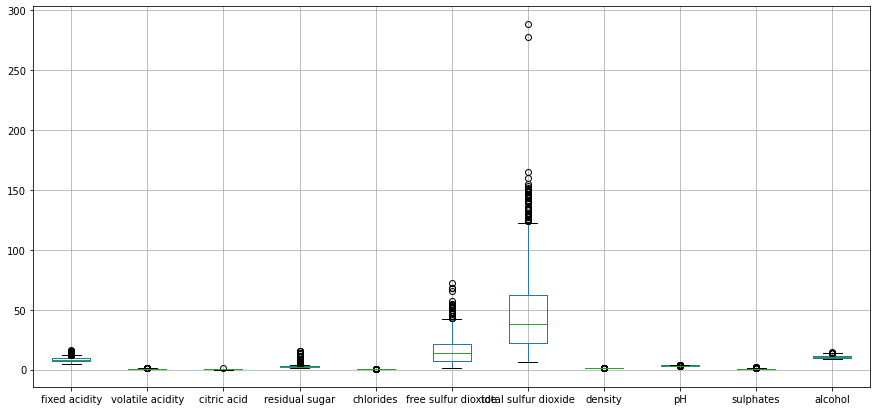

In [ ]:
# Boxplot de todas as colunas.

df.boxplot(figsize=(15,7))

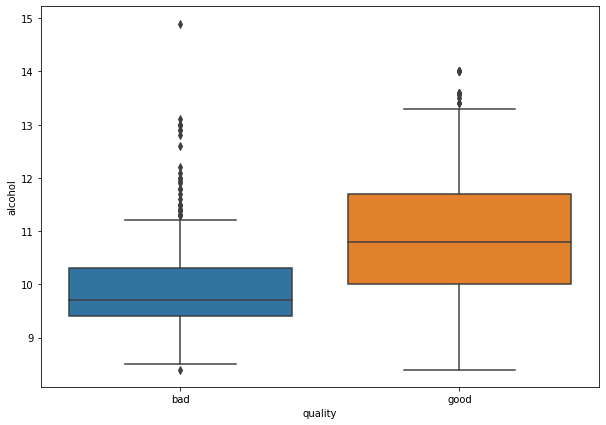

In [ ]:
# define a dimensão do gráfico
plt.figure(figsize=(10,7))

# cria o boxplot
sns.boxplot(x="quality", y="alcohol", data=df, whis=1)

# mostra o gráfico
plt.show()

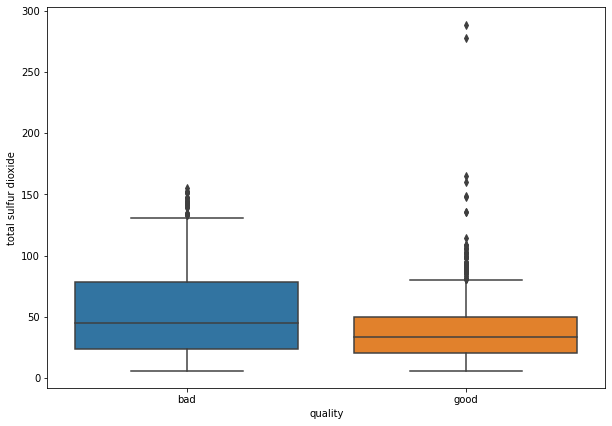

In [ ]:
# define a dimensão do gráfico
plt.figure(figsize=(10,7))

# cria o boxplot
sns.boxplot(x="quality", y="total sulfur dioxide", data=df, whis=1)

#mostra o gráfico
plt.show()



Matriz de Correlação: 


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595


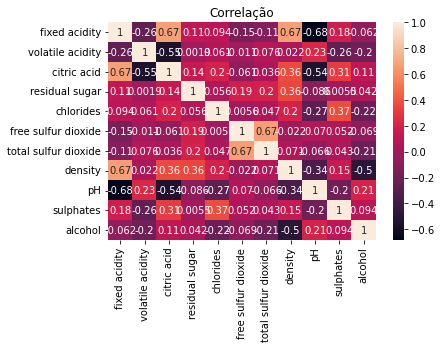

In [ ]:
# criando uma matriz X com os valores do data frame
X = df.iloc[:,:-1].values # exceto a coluna da qualidade (a última = -1)

# matriz de correlação
df_correlation = df.corr()

print('\n\nMatriz de Correlação: ')
display(df_correlation)

# cria um mapa de cores dos valoes da correlação
sns.heatmap(df_correlation, annot=True,
        xticklabels=df_correlation.columns,
        yticklabels=df_correlation.columns)

plt.title('Correlação')
plt.show()

In [ ]:
# fixed acidity e citric acid se relacionam.
# fixed acidity e densityse se relacionam.
# free sulfur dioxide e total sulfur dioxide se relacionam.

In [ ]:
# Analisando se não tem coluna nula.

df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
#Observando quantas ocorrências de cada saída (good or bad)
df["quality"].describe()

count     1599
unique       2
top       good
freq       855
Name: quality, dtype: object

In [ ]:
#trocando good por 1 e bad por 0

df['quality'] = df.quality.map({"bad":0, "good":1})

#df.quality[df.quality == 'bad'] = 0
#df.quality[df.quality == 'good'] = 1
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [ ]:
#separando a coluna quality (resposta) da nossa base
X_columns = df.columns.tolist()
X_columns.remove('quality')

display(X_columns)

X = df[X_columns]
y = df.quality

display(X.shape)
display(y.shape)

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

(1599, 11)

(1599,)

In [ ]:
#separando a base em 70% (treino) e 30%(teste)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2019)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1119, 11)
(480, 11)
(1119,)
(480,)


In [ ]:
#df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Normalizado as Variáveis

---



KNN Holdout

---



In [ ]:

#aplicando o knn com k = 1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
print("Acurácia:", metrics.accuracy_score(y_test, y_pred))

Acurácia: 0.6666666666666666


In [ ]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.60      0.67      0.63       208
           1       0.72      0.67      0.69       272

    accuracy                           0.67       480
   macro avg       0.66      0.67      0.66       480
weighted avg       0.67      0.67      0.67       480



In [ ]:
#foi verificado o modelo em cima do treino para ver se não houve overfitting como nesse caso, 
#onde a precisão é de 100% indicando que houve

y_pred = knn.predict(X_train)
print(classification_report(y_pred, y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       514
           1       1.00      1.00      1.00       605

    accuracy                           1.00      1119
   macro avg       1.00      1.00      1.00      1119
weighted avg       1.00      1.00      1.00      1119



Desempenho KNN Validação Cruzada

---



In [ ]:

val_scores = cross_val_score(KNeighborsClassifier(n_neighbors=20), X_train, y_train, cv=10)
print('Acurácia nos k-folds:', val_scores)
print('Média: {:.2} | Desvio: {:.2}'.format(np.mean(val_scores), np.std(val_scores)))

Acurácia nos k-folds: [0.6875     0.75       0.6875     0.71428571 0.625      0.65178571
 0.6875     0.61607143 0.53571429 0.73873874]
Média: 0.67 | Desvio: 0.061


KNN Hiperparametrizado

---



In [ ]:
#aplicando o knn com k = 3

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.58      0.62      0.60       215
           1       0.68      0.64      0.66       265

    accuracy                           0.63       480
   macro avg       0.63      0.63      0.63       480
weighted avg       0.63      0.63      0.63       480



In [ ]:
#nesse caso mesmo a precisão e a acuracia sendo menor q a anterior mas não teve tanto overfitting

y_pred = knn.predict(X_train)
print(classification_report(y_pred, y_train))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       518
           1       0.83      0.84      0.84       601

    accuracy                           0.82      1119
   macro avg       0.82      0.82      0.82      1119
weighted avg       0.82      0.82      0.82      1119



In [ ]:

knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.57      0.62      0.59       211
           1       0.68      0.63      0.65       269

    accuracy                           0.62       480
   macro avg       0.62      0.62      0.62       480
weighted avg       0.63      0.62      0.62       480



In [ ]:
#nesse caso mesmo a precisão e a acuracia sendo menor q a anterior mas não teve tanto overfitting

y_pred = knn.predict(X_train)
print(classification_report(y_pred, y_train))

              precision    recall  f1-score   support

           0       0.72      0.71      0.71       522
           1       0.75      0.76      0.75       597

    accuracy                           0.73      1119
   macro avg       0.73      0.73      0.73      1119
weighted avg       0.73      0.73      0.73      1119



In [ ]:
#Encontramos o n=20 como o melhor valor, pois mantem um media boa de acertos entre "good" e "bad", 
#a partir desse ponto o modelo começa a piorar

knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.65      0.66      0.66       228
           1       0.69      0.68      0.69       252

    accuracy                           0.67       480
   macro avg       0.67      0.67      0.67       480
weighted avg       0.67      0.67      0.67       480



In [ ]:
# e a diferença entre o traino e o teste não é tão grande, mostrando que não houve overfitting

y_pred = knn.predict(X_train)
print(classification_report(y_pred, y_train))

              precision    recall  f1-score   support

           0       0.73      0.68      0.70       551
           1       0.71      0.75      0.73       568

    accuracy                           0.72      1119
   macro avg       0.72      0.72      0.72      1119
weighted avg       0.72      0.72      0.72      1119



Desempenho KNN Validação Cruzada

---



Desempenho RandomForestClassifier Holdout



---



In [ ]:
modelo = RandomForestClassifier()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       222
           1       0.80      0.78      0.79       258

    accuracy                           0.78       480
   macro avg       0.77      0.77      0.77       480
weighted avg       0.78      0.78      0.78       480



In [ ]:
# aqui vemos que houve um overffiting, pois no treino ele esta acertando todos
# os resultados, mostrando que "decorou" as respostas
y_pred = modelo.predict(X_train)
print(classification_report(y_pred, y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       514
           1       1.00      1.00      1.00       605

    accuracy                           1.00      1119
   macro avg       1.00      1.00      1.00      1119
weighted avg       1.00      1.00      1.00      1119



RandomForestClassifier Hiperparametrizado

---

In [ ]:
modelo = RandomForestClassifier(n_estimators=120, max_depth=2)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.60      0.76      0.67       181
           1       0.82      0.69      0.75       299

    accuracy                           0.71       480
   macro avg       0.71      0.72      0.71       480
weighted avg       0.74      0.71      0.72       480



In [ ]:
y_pred = modelo.predict(X_train)
print(classification_report(y_pred, y_train))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75       474
           1       0.83      0.78      0.80       645

    accuracy                           0.78      1119
   macro avg       0.77      0.78      0.78      1119
weighted avg       0.78      0.78      0.78      1119



In [ ]:
modelo = RandomForestClassifier(n_estimators = 210, max_depth = 2)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.61      0.73      0.66       192
           1       0.79      0.69      0.74       288

    accuracy                           0.70       480
   macro avg       0.70      0.71      0.70       480
weighted avg       0.72      0.70      0.71       480



In [ ]:
y_pred = modelo.predict(X_train)
print(classification_report(y_pred, y_train))

              precision    recall  f1-score   support

           0       0.72      0.75      0.73       493
           1       0.80      0.77      0.78       626

    accuracy                           0.76      1119
   macro avg       0.76      0.76      0.76      1119
weighted avg       0.76      0.76      0.76      1119



In [ ]:
# Melhor resultado encontrado
modelo = RandomForestClassifier(n_estimators = 130, max_depth = 2)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.64      0.75      0.69       197
           1       0.80      0.71      0.75       283

    accuracy                           0.73       480
   macro avg       0.72      0.73      0.72       480
weighted avg       0.74      0.73      0.73       480



In [ ]:
y_pred = modelo.predict(X_train)
print(classification_report(y_pred, y_train))

              precision    recall  f1-score   support

           0       0.74      0.75      0.75       505
           1       0.80      0.78      0.79       614

    accuracy                           0.77      1119
   macro avg       0.77      0.77      0.77      1119
weighted avg       0.77      0.77      0.77      1119



In [ ]:
modelo = RandomForestClassifier(n_estimators = 100, max_depth = 3)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.65      0.73      0.69       203
           1       0.78      0.71      0.74       277

    accuracy                           0.72       480
   macro avg       0.72      0.72      0.72       480
weighted avg       0.73      0.72      0.72       480



In [ ]:
y_pred = modelo.predict(X_train)
print(classification_report(y_pred, y_train))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77       516
           1       0.80      0.80      0.80       603

    accuracy                           0.79      1119
   macro avg       0.79      0.79      0.79      1119
weighted avg       0.79      0.79      0.79      1119



Comparação dos Métodos

---



  O melhor resultado encontrado com o uso do KNN foi de

              precision    recall  f1-score   support

           0       0.65      0.66      0.66       228
           1       0.69      0.68      0.69       252

    accuracy                           0.67       480

usando o n = 20

Ja com o uso do RandomForestClassifier, usando 130 arvores com profundidade 2 encontramos o resultado
              precision    recall  f1-score   support

           0       0.64      0.75      0.69       197
           1       0.80      0.71      0.75       283

    accuracy                           0.73       480

Conclusão

---



Após todas as tentativas de encotrar o melhor modelo preditivo, conforme registrado acima, alem do metodo GradientBoostingClassifier que também testamos, mas a taxa de overfitting estava ficnado muito elevada, concluimos que o melhor encontrafo foi utilizando o metodo do RandomForestClassifier, pois teve uma precisão e acuracia boa e manteve um equilibrio entre a taxa de acertos entre as duas classificações, indicando que não estava jogando apenas para um lado